In [19]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# What are the various variables in the data
# RM : average number of rooms per dwelling 
# LSTAT: % lower status of the population 
# MEDV: Median value of owner-occupied homes in $1000's
# PTRATIO : PTRATIO: pupil-teacher ratio by town

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
print features.head()
print features.shape

print features.info()
print features.describe()
    
# Success
print "Boston housing dataset has %d data points with %d variables each." %data.shape

      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7
(489, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 488
Data columns (total 3 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
dtypes: float64(3)
memory usage: 15.3 KB
None
Boston housing dataset has 489 data points with 4 variables each.


In [4]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


{'boxes': [<matplotlib.lines.Line2D at 0x10b27f4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x10b2862d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x10b23b310>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10b243550>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10b27f950>,
  <matplotlib.lines.Line2D at 0x10b230f50>]}

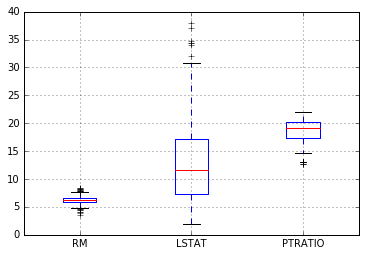

In [28]:
x = data.boxplot(return_type='dict')
prices.boxplot()

(489, 1)
(489,)
[ 232209.04890668]


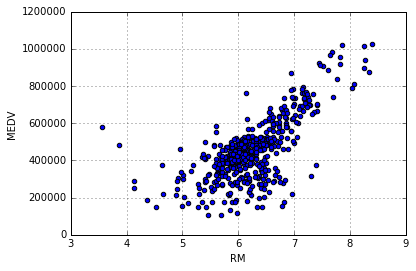

In [56]:
data.plot(kind='scatter',x='RM', y='MEDV')
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
rooms = np.array(data['RM'])
rooms = rooms.reshape(len(rooms), 1)
print rooms.shape
price = np.array(data['MEDV'])
print price.shape
reg.fit(rooms,price)
print reg.predict([5])

[ 382234.67150315]


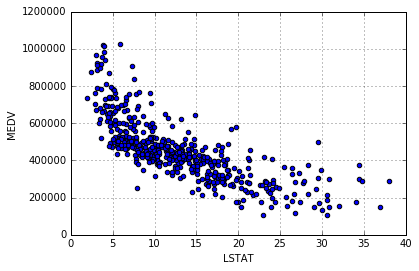

In [57]:
data.plot(kind='scatter',x='LSTAT', y='MEDV')
lstat  = np.array(data['LSTAT'])
lstat = lstat.reshape(len(lstat),1)
reg.fit(lstat,price)
print reg.predict([17])

In [59]:
lstat  = np.array(data[['RM','LSTAT']])
reg.fit(lstat,price)
print reg.predict([5,17])

[ 285713.5201611]


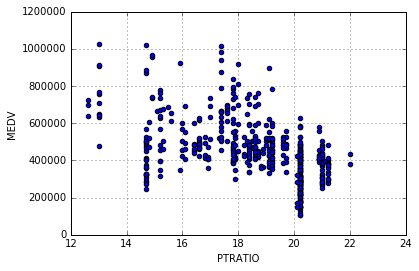

In [36]:
data.plot(kind='scatter',x='PTRATIO', y='MEDV')

(1000, 1)
Regressor score: 0.3956
[ 66 216 366 516 666]
[[ 0.37039082  0.36892763  0.55337436]
 [ 0.37213814  0.41098748  0.40401704]
 [ 0.40703223  0.45074926  0.29652536]
 [ 0.39186379  0.44457191  0.34570754]
 [ 0.38057616  0.4426461   0.36212373]]


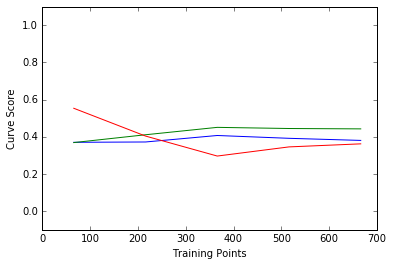

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.cross_validation import KFold
import numpy as np

# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high bias
X = np.reshape(np.random.normal(scale=2,size=size),(-1,1))
y = np.array([[1 - 2*x[0] +x[0]**2] for x in X])
print X.shape
def plot_curve():
    reg = LinearRegression()
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
    
    # TODO: Use learning_curve imported above to create learning curves for both the
    #       training data and testing data. You'll need 'size', 'cv' and 'score' from above.
    
    training_sizes, training_scores, testing_scores = learning_curve(reg,X,y,cv=cv,scoring=score)
    print training_sizes
    print training_scores
    # TODO: Plot the training curves and the testing curves
    #       Use plt.plot twice -- one for each score. Be sure to give them labels!
    plt.plot(training_sizes,training_scores)
    #plt.plot(training_sizes,testing_scores)

    
    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()
    
plot_curve()

In [50]:
print data[(data['RM'] < 5.5) & (data['LSTAT'] < 17.5)]

        RM  LSTAT  PTRATIO    MEDV
18   5.456  11.69     21.0  424200
151  5.404  13.28     14.7  411600
152  5.012  12.12     14.7  321300
156  5.272  16.14     14.7  275100
299  4.973  12.64     18.4  338100
351  5.362  10.19     20.2  436800
353  3.561   7.12     20.2  577500
354  4.963  14.00     20.2  459900
355  3.863  13.33     20.2  485100
